In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
aa_frequencies = pd.read_csv("../../statistics/aa_frequencies_nr.csv", header=0)
aa_frequencies

aa_frequencies = pd.DataFrame( {'letter': {0: 'L', 1: 'A', 2: 'G', 3: 'V', 4: 'S', 5: 'E', 6: 'T', 7: 'R', 8: 'D', 9: 'I', 10: 'P', 11: 'K', 12: 'F', 13: 'N', 14: 'Q', 15: 'Y', 16: 'M', 17: 'H', 18: 'W', 19: 'C', 20: 'X', 21: 'U', 22: 'B', 23: 'J', 24: 'Z', 25: 'O'}, 'frequency': {0: 0.098449666, 1: 0.093676297, 2: 0.07384495, 3: 0.07067984, 4: 0.065342661, 5: 0.060719804, 6: 0.057368475, 7: 0.057127153, 8: 0.055440054, 9: 0.054336378, 10: 0.048369393, 11: 0.048066712, 12: 0.038860925, 13: 0.03851817, 14: 0.037271483, 15: 0.030088765, 16: 0.022660274, 17: 0.021374994, 18: 0.012889268, 19: 0.012823309, 20: 0.002090249, 21: 5.12e-07, 22: 3.29e-07, 23: 2.33e-07, 24: 1.06e-07, 25: 3.22e-10}} )
aa_frequencies

,letter,frequency
0,L,9.844967e-02
1,A,9.367630e-02
2,G,7.384495e-02
3,V,7.067984e-02
4,S,6.534266e-02
5,E,6.071980e-02
6,T,5.736848e-02
7,R,5.712715e-02
8,D,5.544005e-02
9,I,5.433638e-02


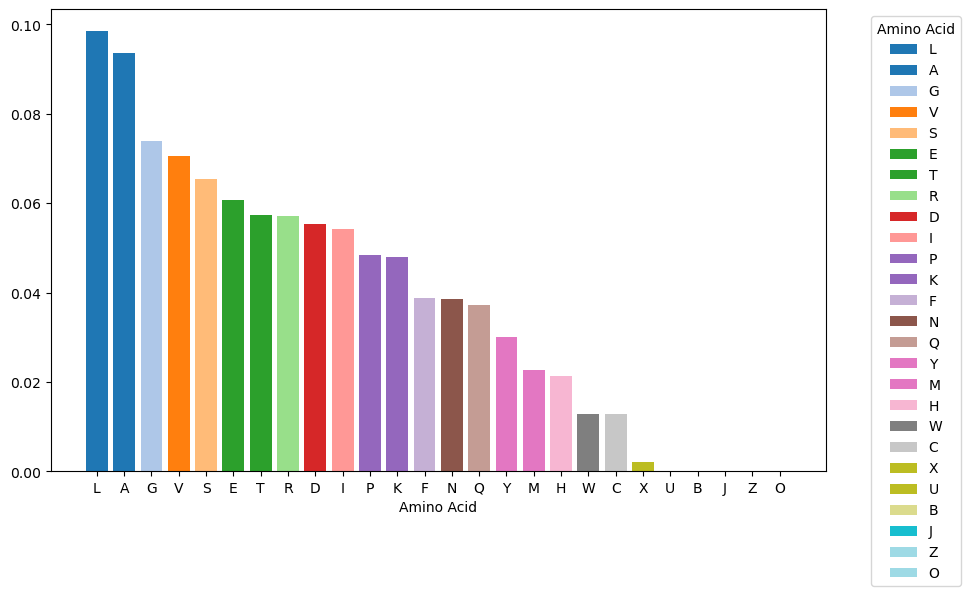

In [51]:
colors = plt.cm.tab20(np.linspace(0, 1, len(aa_frequencies)))

plt.figure(figsize=(10,6))
bars = plt.bar(aa_frequencies["letter"], aa_frequencies["frequency"], color=colors)
plt.xlabel("Amino Acid")

# Add legend
plt.legend(bars, aa_frequencies["letter"], title="Amino Acid", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

[B, D, E, K, N, O, Q, R, X, Z], [A, S, T], [I, J, L, V], [G], [P], [F], [Y], [C, U], [H], [M], [W]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


AttributeError: 'NoneType' object has no attribute 'get_bbox'

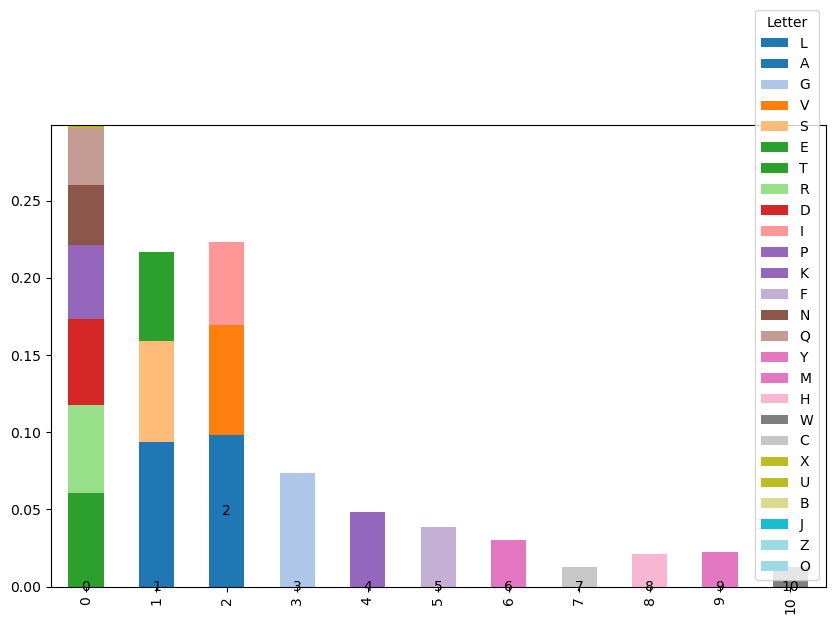

In [170]:
base11 = [["B", "D", "E", "K", "N", "O", "Q", "R", "X", "Z"], ["A", "S", "T"], ["I", "J", "L", "V"], ["G"], ["P"], ["F"], ["Y"], ["C", "U"], ["H"], ["M"], ["W"]]

# Create a DataFrame for the stacked bar plot
stacked_data = pd.DataFrame({"Letter": aa_frequencies["letter"]})

# Assign frequencies to corresponding base11 groups
for i, group in enumerate(base11):
    stacked_data[str(i)] = np.where(stacked_data["Letter"].isin(group), aa_frequencies["frequency"], 0)

# Plot the stacked bar chart
ax = stacked_data.set_index("Letter").T.plot(
    kind="bar", stacked=True, figsize=(10, 6), color=colors
)

for i, container in enumerate(ax.containers):
    # labels = [stacked_data["Letter"][j] if stacked_data.loc[j,str(i)] > 0 else "" for j in range(len(stacked_data["Letter"]))]
    labels = [x for x in range(20)]
    print(labels)
    ax.bar_label(container, labels=labels, label_type='center')

# # Add labels to the bars
# for i, container in enumerate(ax.containers):
#     for j, bar in enumerate(container):
#         print(str(i) + " " + str(j))
#         height = bar.get_y() + bar.get_height()
#         print(height)
#         if bar.get_height() > 0:  # Only label visible bars
#             middle_height = bar.get_y() + bar.get_height() / 2  # Middle of the stacked section
#             ax.text(
#                 bar.get_x() + bar.get_width() / 2, middle_height,  # Center label in the bar
#                 stacked_data["Letter"][j] if stacked_data.loc[j,str(i)] > 0 else "",
#                 ha='center', va='center', fontsize=10, rotation=90, color='black'
#             )

plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of base11 Mapping")
plt.legend(title="Value", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [184]:
stacked_data.iloc[2][1:4]

0    0.0
1    0.0
2    0.0
Name: 2, dtype: object

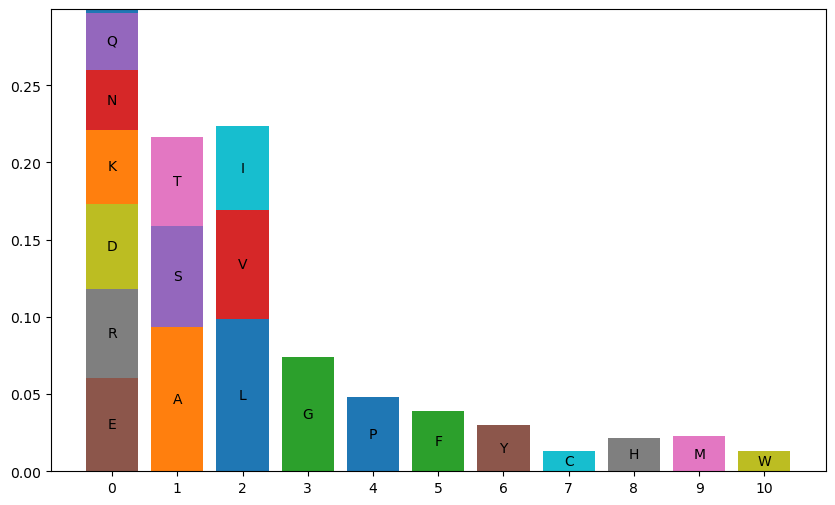

In [222]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.8  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(10, 6))
labels = [str(x) for x in range(stacked_data.shape[1] - 1)]
bottom = np.zeros(stacked_data.shape[1] - 1)

for i, row in stacked_data.iterrows():
    p = ax.bar(
        labels,
        row[1:],
        width,
        bottom=bottom)
    ax.bar_label(p, label_type='center', labels=[row.iloc[0] if x > 0.01 else "" for x in row[1:]])
    bottom += row[1:]

plt.show()

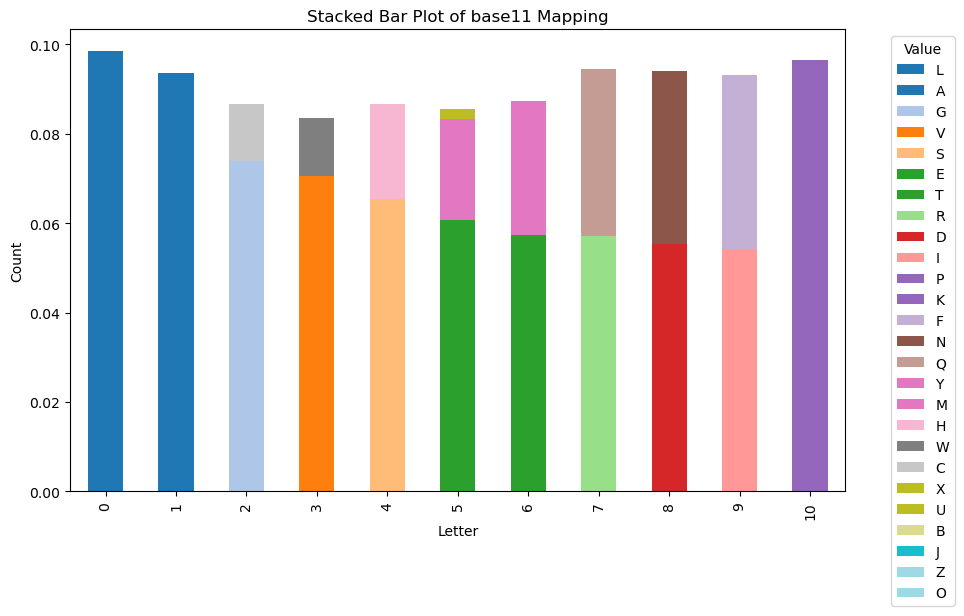

In [53]:
plt.show()
base11 = [["L"], ["A"], ["G", "C"], ["V", "W", "U", "B", "J", "Z", "O"], ["S", "H"], ["E", "M", "X"], ["T", "Y"], ["R", "Q"], ["D", "N"], ["I", "F"], ["P", "K"]]

# Create a new DataFrame for stacked bar plot
stacked_data = pd.DataFrame({
    "Letter": aa_frequencies["letter"],
    '0': np.where(aa_frequencies["letter"].isin(base11[0]), aa_frequencies["frequency"], 0),
    '1': np.where(aa_frequencies["letter"].isin(base11[1]), aa_frequencies["frequency"], 0),
    '2': np.where(aa_frequencies["letter"].isin(base11[2]), aa_frequencies["frequency"], 0),
    '3': np.where(aa_frequencies["letter"].isin(base11[3]), aa_frequencies["frequency"], 0),
    '4': np.where(aa_frequencies["letter"].isin(base11[4]), aa_frequencies["frequency"], 0),
    '5': np.where(aa_frequencies["letter"].isin(base11[5]), aa_frequencies["frequency"], 0),
    '6': np.where(aa_frequencies["letter"].isin(base11[6]), aa_frequencies["frequency"], 0),
    '7': np.where(aa_frequencies["letter"].isin(base11[7]), aa_frequencies["frequency"], 0),
    '8': np.where(aa_frequencies["letter"].isin(base11[8]), aa_frequencies["frequency"], 0),
    '9': np.where(aa_frequencies["letter"].isin(base11[9]), aa_frequencies["frequency"], 0),
    '10': np.where(aa_frequencies["letter"].isin(base11[10]), aa_frequencies["frequency"], 0)
})

# Plot stacked bar chart
stacked_data.set_index('Letter').T.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of base11 Mapping')
plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()